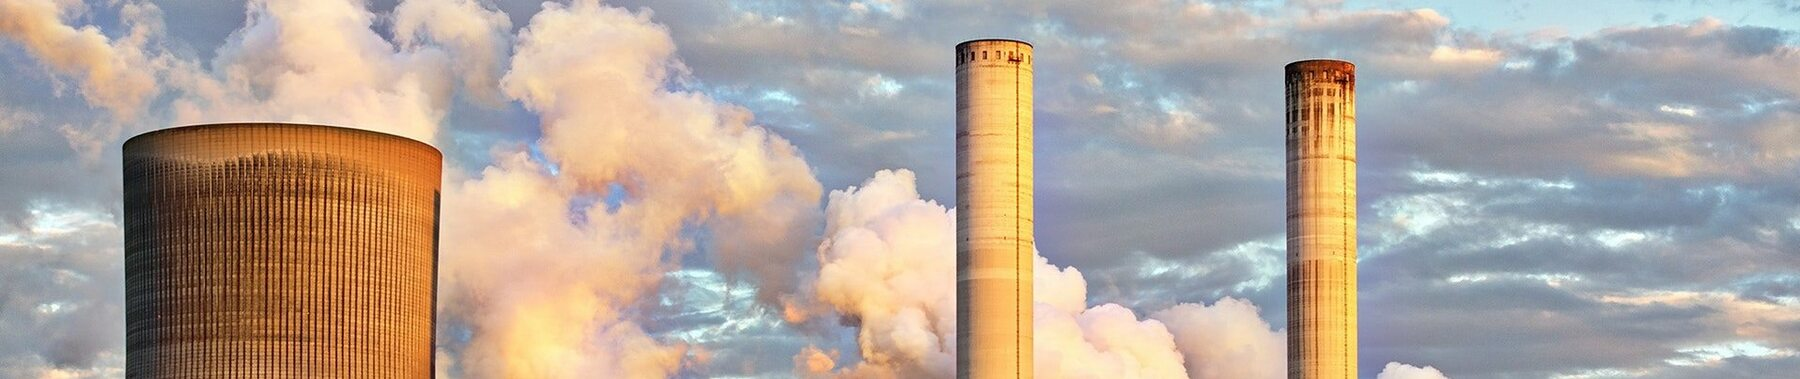

# Group Project

## Data Science MBAN 6110 T

### This notebook is by Group 8
#### Members
- Iram Cheema
- Kiersten Campbell
- Nana Amina Abubakar
- Tianchen Zhu
- Yuchen Zhang
- Zhilin Wan

#### Chosen Dataset 
Air Quality Data in India (2015 - 2020) from Kaggle. This can be accessed using this link https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india. 
The dataset contains air quality data and AQI (Air Quality Index) at daily level of various stations across multiple cities in India.

## Table of Content

1. [Import Libraries](#-1.-Import-Librairies)

2. [Understanding The Data](#-2.-Understanding-the-data)

3. [Cleaning the data ](#-3.-Data-Cleaning)

4. [Exploratory Data Analysis](#-4.-Exploratory-Data-Analysis)

5. [Feature Engineering](#-5.-Feature-Engineering)

6. [Model Development and Evaluation](#-6.-Model-Development-and-Evaluation)

7. [Conclusion](#-7.-Conclusion)

# 1. Import Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# 2. Understanding the data

In [2]:
df = pd.read_csv('city_day.csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

#### Explanation of the columns variable

- City: The city where the measurements were taken.
- Date: The date when the measurements were taken.
- PM2.5: Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high.
- PM10: Inhalable particles, with diameters that are generally 10 micrometers and smaller.
- NO: Nitric oxide concentration.
- NO2: Nitrogen dioxide concentration.
- NOx: Nitrogen oxides concentration.
- NH3: Ammonia concentration.
- CO: Carbon monoxide concentration.
- SO2: Sulfur dioxide concentration.
- O3: Ozone concentration.
- Benzene: Benzene concentration.
- Toluene: Toluene concentration.
- Xylene: Xylene concentration.
- AQI: Air Quality Index.
- AQI_Bucket: The category of the Air Quality Index.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


#### From the info() function:
We can see that out of 29531 entries, only the City & Date has a complete data set
- PM 2.5 has (29531-24933) = 4598 missing data points, or roughly 15.6% missing data
- PM 10 has (29531-18391) = 11140 missing data points, or roughly 37.72% missing data
- NO has (29531-25949) = 3582 missing data points, or exactly 12.13% missing data
- NO2 has (29531-25946) = 3585 missing data points, or roughly 12.14% missing data
- NOx has (29531-25346) = 4185 missing data points, or roughly 14.17% missing data
- NH3 has (29531-19203) = 10328 missing data points, or roughly 34.97% missing data
- CO has (29531-27472) = 2059 missing data points, or roughly 6.97% missing data
- SO2 has (29531-25677) = 3854 missing data points, or roughly 13.05% missing data
- O3 has (29531-25509) = 4022 missing data points, or roughly 13.62% missing data
- Benzene has (29531-23908) = 5623 missing data points, or roughly 19.04% missing data
- Toluene has (29531-21490) = 8041 missing data points, or roughly 27.23% missing data
- Xylene has (29531-11422) = 18109 missing data points, or roughly 61.32% missing data
- AQI has (29531-24850) = 4681 missing data points, or roughly 15.85% missing data
- AQI_Bucket has (29531-24850) = 4681 missing data points, or roughly 15.85% missing data

While each column has roughly 10% missing data, collectively there is about 47.94% of missing data.

In [6]:
df.isna().mean()

City          0.000000
Date          0.000000
PM2.5         0.155701
PM10          0.377231
NO            0.121296
NO2           0.121398
NOx           0.141715
NH3           0.349734
CO            0.069723
SO2           0.130507
O3            0.136196
Benzene       0.190410
Toluene       0.272290
Xylene        0.613220
AQI           0.158511
AQI_Bucket    0.158511
dtype: float64

In [7]:
df.describe(include='all')

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,29531,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,24850
unique,26,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Mumbai,2020-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,2009,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8829
mean,NaN,NaN,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,NaN
std,NaN,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,NaN
min,NaN,NaN,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,NaN
25%,NaN,NaN,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,NaN
50%,NaN,NaN,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,NaN
75%,NaN,NaN,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,NaN


Now let's look at some initial descriptive statistics to understand what our data looks like. We can use the describe() function. We are adding an include='all' parameter because we have categorical data. We can see the following:
Here is the revised version of your observations that follow a consistent format:

* City has 26 unique values. Ahmedabad is the most frequently occurring city, appearing in 2009 entries, which is approximately 6.8% of all data.
* Date has 2009 unique values. The most frequently occurring date is 2020-07-01, appearing in 26 entries, which is approximately 0.08% of all data.
* PM2.5 has 24933 non-null entries with the median of 48.57 and the mean of 67.45, which indicates a positive skewness. The maximum value of PM2.5 is 949.99, which could potentially be an outlier.
* PM10 has 18391 non-null entries with the median of 95.68 and the mean of 118.13, which indicates a positive skewness. The maximum value of PM10 is 1000.0, which could potentially be an outlier.
* NO has 25949 non-null entries. The median is 9.89 while the mean is 17.57, suggesting a positive skewness. The maximum value of NO is 390.68, which might be an outlier.
* NO2 has 25946 non-null entries. The median is 21.69 and the mean is 28.56, indicating a positive skewness. The maximum value of NO2 is 362.21, which could be an outlier.
* NH3 has 19203 non-null entries. The median value is 15.85 and the mean is 23.48, indicating a positive skewness. The maximum value of NH3 is 352.89, which may be an outlier.
* CO has 27472 non-null entries. The median value is 0.89 and the mean value is 2.25, indicating a positive skewness. The maximum value of CO is 175.81, which may be an outlier.
* SO2 has 25677 non-null entries. The median value is 9.16 while the mean value is 14.53, indicating a positive skewness. The maximum value of SO2 is 193.86, which might be an outlier.
* O3 has 25509 non-null entries. The median value is 30.84 and the mean value is 34.49, suggesting a slight positive skewness. The maximum value of O3 is 257.73, which could be an outlier.
* Benzene has 23908 non-null entries. The median value is 1.07 while the mean is 3.28, indicating a positive skewness. The maximum value of Benzene is 455.03, which might be an outlier.
* Toluene has 21490 non-null entries. The median value is 2.97 and the mean is 8.70, suggesting a positive skewness. The maximum value of Toluene is 454.85, which could be an outlier.
* Xylene has 11422 non-null entries. The median value is 0.98 and the mean is 3.07, indicating a positive skewness. The maximum value of Xylene is 170.37, which might be an outlier.
* AQI (Air Quality Index) has 24850 non-null entries. The median value is 118 and the mean is 166.46, indicating a positive skewness. The maximum AQI is 2049, which could be an outlier.
* AQI_Bucket has 6 unique values, with 'Moderate' being the most frequently occurring category, appearing 8829 times.

# 3. Data Cleaning

In [8]:
# We can use a simple filter to check if any row has all column data missing
drop_Value = df[df['PM2.5'].isnull() & df['PM10'].isnull() & df['NO'].isnull() & df['NO2'].isnull() & df['NH3'].isnull() & df['CO'].isnull() & df['SO2'].isnull() & df['O3'].isnull() & df['Benzene'].isnull() & df['Toluene'].isnull() & df['Xylene'].isnull() & df['AQI'].isnull()]


In [9]:
drop_Value

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
56,Ahmedabad,2015-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,Ahmedabad,2015-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,Ahmedabad,2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,Ahmedabad,2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,Ahmedabad,2015-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29226,Visakhapatnam,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29227,Visakhapatnam,2019-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29228,Visakhapatnam,2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29229,Visakhapatnam,2019-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Drop those Value
df.drop(drop_Value.index, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28156 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        28156 non-null  object 
 1   Date        28156 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25345 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.7+ MB


In [12]:
df.isna().mean()

City          0.000000
Date          0.000000
PM2.5         0.114469
PM10          0.346818
NO            0.078385
NO2           0.078491
NOx           0.099837
NH3           0.317978
CO            0.024293
SO2           0.088045
O3            0.094012
Benzene       0.150874
Toluene       0.236752
Xylene        0.594332
AQI           0.117417
AQI_Bucket    0.117417
dtype: float64

In [13]:
df_test = df.copy()

In [14]:
df_test.groupby('City').describe()

PM2.5                                                 \
                     count        mean        std    min      25%     50%   
City                                                                        
Ahmedabad           1381.0   67.854497  39.491450   3.04  39.4300  58.370   
Aizawl               111.0   17.130000  15.287995   0.16   3.7650  10.480   
Amaravati            892.0   37.773217  27.255732   4.65  17.0600  28.015   
Amritsar            1093.0   55.468335  51.394067   2.85  31.6800  44.090   
Bengaluru           1863.0   35.819828  22.073252   1.72  21.2950  30.920   
Bhopal               280.0   50.059571  30.431590   3.40  23.0725  44.840   
Brajrajnagar         753.0   64.057610  36.167215   2.54  34.2600  60.630   
Chandigarh           289.0   41.130242  28.208979   6.86  19.1700  33.270   
Chennai             1892.0   50.425613  26.703847   6.55  33.2750  45.545   
Coimbatore           378.0   29.151587  11.150033   2.13  20.9075  28.515   
Delhi               2007.0  117.196153  82.912945  10.24  57.0950  94.620   
Ernakulam            158.0   24.944747  14.978580   3.48  13.9375  19.755   
Gurugram            1525.0  117.104007  99.056336   3.42  57.2400  90.150   
Guwahati             501.0   63.685429  61.631773   5.39  23.4500  46.780   
Hyderabad           1891.0   47.035357  38.522589   4.83  25.7900  42.000   
Jaipur              1102.0   54.500708  26.551826   9.12  36.3000  49.750   
Jorapokhar           379.0   64.228918  32.563684  10.04  43.4600  60.690   
Kochi                162.0   31.428519  20.049744   5.97  16.4150  24.285   
Kolkata              759.0   64.362833  58.381092   3.56  21.2000  43.550   
Lucknow             1907.0  109.714059  79.754590  11.39  47.5450  86.090   
Mumbai               784.0   35.198393  25.913623   3.84  15.2475  23.745   
Patna               1537.0  123.498562  94.170444  10.78  51.7000  91.120   
Shillong             246.0   30.823984  83.643643   2.03  10.3425  17.425   
Talcher              741.0   61.405425  50.131582   0.04  25.0900  44.640   
Thiruvananthapuram  1070.0   28.036617  17.817340   2.00  14.9100  22.380   
Visakhapatnam       1232.0   46.969610  28.057120   2.00  27.0425  40.610   

                                        PM10              ...  Xylene          \
                         75%     max   count        mean  ...     75%     max   
City                                                      ...                   
Ahmedabad            87.1800  381.69   407.0  114.584029  ...  6.9000  109.23   
Aizawl               29.1950   54.90   112.0   23.352857  ...     NaN     NaN   
Amaravati            52.7375  139.38   896.0   76.362020  ...  0.1800  137.45   
Amritsar             63.6700  868.66  1158.0  115.202599  ...  9.8375   53.59   
Bengaluru            44.2500  313.59  1649.0   83.243287  ...     NaN     NaN   
Bhopal               70.1075  136.42   280.0  119.324321  ...     NaN     NaN   
Brajrajnagar         86.2000  308.79   765.0  124.217373  ...     NaN     NaN   
Chandigarh           53.9600  154.85   304.0   85.656546  ...  1.3125  116.62   
Chennai              61.5000  293.43   302.0   62.834404  ...     NaN     NaN   
Coimbatore           36.4950   63.10   379.0   37.982137  ...     NaN     NaN   
Delhi               153.0300  685.36  1932.0  232.809229  ...  1.9700   23.30   
Ernakulam            36.3075   78.27   158.0   48.335633  ...  0.1900    1.98   
Gurugram            148.8500  949.99   740.0  191.504432  ...  5.7400   26.17   
Guwahati             91.5300  916.67   502.0  116.604900  ...     NaN     NaN   
Hyderabad            61.4150  571.02  1651.0   91.931532  ...  1.8650   28.24   
Jaipur               67.1300  311.35  1100.0  123.483509  ...     NaN     NaN   
Jorapokhar           82.8050  217.13   894.0  149.657942  ...     NaN     NaN   
Kochi                45.7700  143.85   162.0   67.335432  ...     NaN     NaN   
Kolkata              89.7050  304.74   759.0  115.629499  ...  3.3900   13.54   
Luckn

In [15]:
df_test['City'] = df_test['City'].fillna('Other')

In [16]:
# Filter numerical columns
num_cols = df.drop(['City', 'Date'], axis=1)

# Convert columns to numeric
num_cols = num_cols.apply(pd.to_numeric, errors='coerce')

# Get the median of numerical columns
num_cols_median = num_cols.median()

# Fill missing values with median for numerical columns
df_fill = df.copy()  # Create a copy of the original DataFrame
df_fill[num_cols.columns] = df_fill[num_cols.columns].fillna(num_cols_median)


In [17]:
# Fill the numerical columns with median
df.fillna(num_cols_median, inplace=True)

In [18]:
# For categorical columns, we use the mode
cat_cols_mode = df.select_dtypes(include=['object']).mode().iloc[0]

In [19]:
# Fill the categorical columns with mode
df.fillna(cat_cols_mode, inplace=True)

In [20]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28156 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        28156 non-null  object 
 1   Date        28156 non-null  object 
 2   PM2.5       28156 non-null  float64
 3   PM10        28156 non-null  float64
 4   NO          28156 non-null  float64
 5   NO2         28156 non-null  float64
 6   NOx         28156 non-null  float64
 7   NH3         28156 non-null  float64
 8   CO          28156 non-null  float64
 9   SO2         28156 non-null  float64
 10  O3          28156 non-null  float64
 11  Benzene     28156 non-null  float64
 12  Toluene     28156 non-null  float64
 13  Xylene      28156 non-null  float64
 14  AQI         28156 non-null  float64
 15  AQI_Bucket  28156 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.7+ MB


In [22]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,28156.000000,28156.000000,28156.000000,28156.000000,28156.000000,28156.000000,28156.000000,28156.000000,28156.000000,28156.000000,28156.000000,28156.000000,28156.000000
mean,65.289330,110.342050,16.972364,28.021372,31.428835,21.056195,2.215593,14.059001,34.148152,2.947283,7.344151,1.827899,160.773121
std,61.144204,74.001404,21.971862,23.567112,30.136914,21.506912,6.880966,17.383835,20.677413,14.591082,17.615054,4.156020,133.095895
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,31.160000,76.287500,5.970000,12.480000,14.077500,11.670000,0.520000,5.940000,20.040000,0.210000,1.150000,0.980000,86.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,74.640000,115.425000,18.380000,35.785000,37.380000,22.875000,1.430000,14.290000,43.590000,2.560000,6.460000,0.980000,186.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


#### Outliers
Let us fix outliers!

<AxesSubplot:ylabel='PM2.5'>

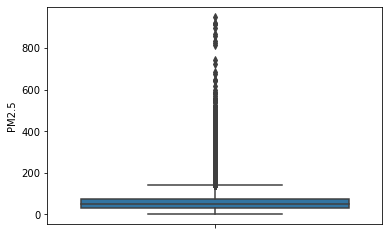

In [23]:
sns.boxplot(data = df, y='PM2.5')

In [24]:
drop_price_outliers = df[df['PM2.5']>200].index
drop_price_outliers

Int64Index([   51,    53,    87,   292,   298,   307,   308,   666,   667,
              669,
            ...
            26106, 26122, 26123, 26763, 26780, 26795, 26797, 26798, 26799,
            28996],
           dtype='int64', length=1136)

In [25]:
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='PM10'>

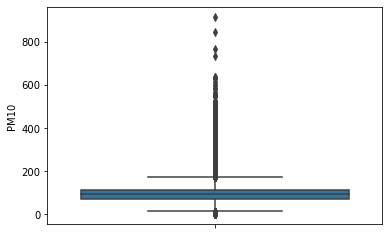

In [26]:
sns.boxplot(data = df, y='PM10')

In [27]:
drop_price_outliers = df[df['PM10']>200].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='NO'>

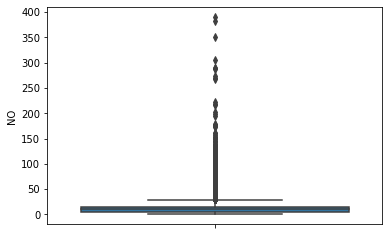

In [28]:
sns.boxplot(data = df, y='NO')

In [29]:
drop_price_outliers = df[df['NO']>50].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='NO2'>

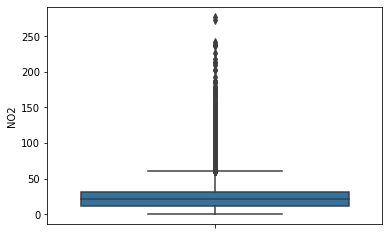

In [30]:
sns.boxplot(data = df, y='NO2')

In [31]:
drop_price_outliers = df[df['NO2']>75].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='NOx'>

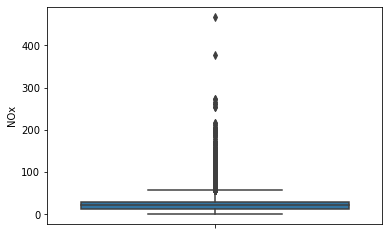

In [32]:
sns.boxplot(data = df, y='NOx')

In [33]:
drop_price_outliers = df[df['NOx']>100].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='NH3'>

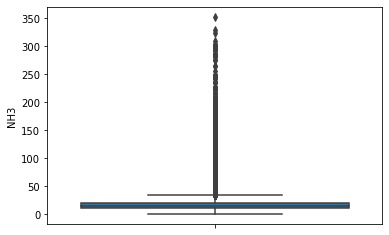

In [34]:
sns.boxplot(data = df, y='NH3')

In [35]:
drop_price_outliers = df[df['NH3']>50].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='CO'>

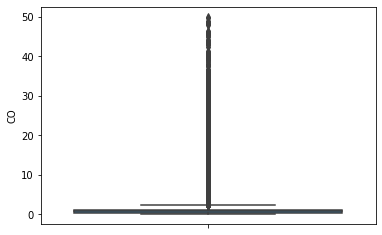

In [36]:
sns.boxplot(data = df, y='CO')

In [37]:
drop_price_outliers = df[df['CO']>7].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='SO2'>

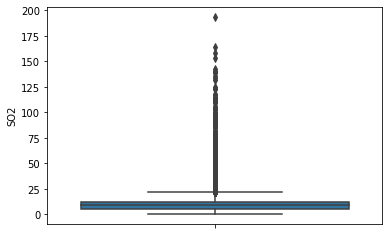

In [38]:
sns.boxplot(data = df, y='SO2')

In [39]:
drop_price_outliers = df[df['SO2']>25].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='O3'>

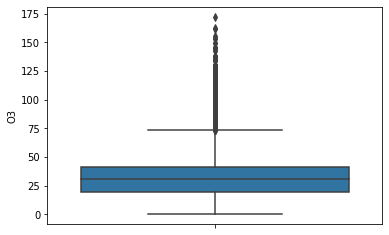

In [40]:
sns.boxplot(data = df, y='O3')

In [41]:
drop_price_outliers = df[df['O3']>75].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='Benzene'>

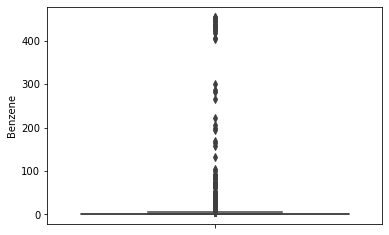

In [42]:
sns.boxplot(data = df, y='Benzene')

In [43]:
drop_price_outliers = df[df['Benzene']>5].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='Toluene'>

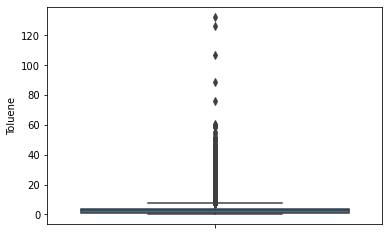

In [44]:
sns.boxplot(data = df, y='Toluene')

In [45]:
drop_price_outliers = df[df['Toluene']>15].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='Xylene'>

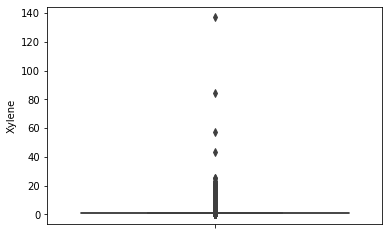

In [46]:
sns.boxplot(data = df, y='Xylene')

In [47]:
drop_price_outliers = df[df['Xylene']>2].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

<AxesSubplot:ylabel='AQI'>

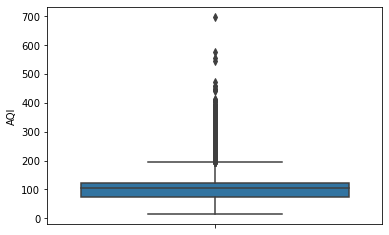

In [48]:
sns.boxplot(data = df, y='AQI')

In [49]:
drop_price_outliers = df[df['AQI']>200].index
drop_price_outliers
df.drop(drop_price_outliers, inplace=True)

#### Finally, we removed all of the outliers!

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14402 entries, 3 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        14402 non-null  object 
 1   Date        14402 non-null  object 
 2   PM2.5       14402 non-null  float64
 3   PM10        14402 non-null  float64
 4   NO          14402 non-null  float64
 5   NO2         14402 non-null  float64
 6   NOx         14402 non-null  float64
 7   NH3         14402 non-null  float64
 8   CO          14402 non-null  float64
 9   SO2         14402 non-null  float64
 10  O3          14402 non-null  float64
 11  Benzene     14402 non-null  float64
 12  Toluene     14402 non-null  float64
 13  Xylene      14402 non-null  float64
 14  AQI         14402 non-null  float64
 15  AQI_Bucket  14402 non-null  object 
dtypes: float64(13), object(3)
memory usage: 1.9+ MB


In [51]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000
mean,40.193943,82.281524,9.497215,20.160324,20.971632,15.875053,0.814808,8.397475,30.711218,0.866893,2.582013,0.809924,98.789057
std,20.658022,34.770574,7.667752,11.994288,15.358501,9.368865,0.719090,4.531974,15.254710,0.950267,2.586028,0.411301,35.378948
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.040000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,23.702500,54.977500,4.380000,10.880000,9.750000,9.820000,0.380000,5.192500,19.730000,0.080000,0.420000,0.840000,71.000000
50%,40.790000,95.680000,8.540000,19.790000,20.065000,15.850000,0.730000,8.050000,30.840000,0.685000,2.970000,0.980000,100.000000
75%,48.570000,95.680000,10.760000,25.440000,26.520000,17.580000,1.050000,10.100000,39.167500,1.070000,2.970000,0.980000,118.000000
max,197.410000,199.680000,49.890000,74.890000,99.960000,50.000000,6.990000,25.000000,74.980000,5.000000,14.960000,2.000000,200.000000


We have completed the date cleaning step and we have 14402 available dates left.

First we fill all the empty values with the median, since this is the number least likely to affect the entire data structure, and by doing this we have 28,156 valid values. Next, we use boxplot to evaluate outliers and then remove them from our data. Finally we are left with 14,402 usable values
 
Now, let's move on to Data Exploration.


# 4. Exploratory Data Analysis

## Business Perspective

- Problem Statement

The disparity in air quality across Indian cities calls for a thorough analysis and effective measures to address this environmental concern, aiming to improve public health and well-being. 

- Hypothesis

Higher amounts of all parameters causes a higher AQI per city (Air Pollution)

<AxesSubplot:xlabel='City'>

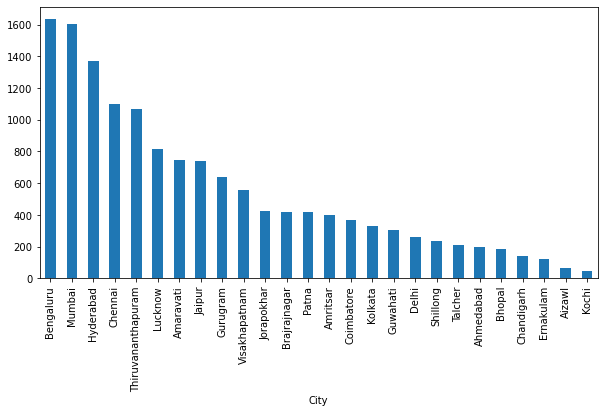

In [52]:
df.groupby('City')['PM2.5'].count().sort_values(ascending=False).plot(kind='bar', figsize=(10,5))

In [53]:
City_by_PM25 = df.groupby('City')['PM2.5'].aggregate(['sum','mean','median','count'])
City_by_PM25

,sum,mean,median,count
City,,,,
Ahmedabad,9138.66,45.922915,48.570,199
Aizawl,1356.34,19.946176,14.865,68
Amaravati,23224.05,31.215121,24.810,744
Amritsar,17366.77,43.855480,41.655,396
Bengaluru,57660.87,35.331415,31.540,1632
Bhopal,7928.04,43.087174,39.595,184
Brajrajnagar,19731.13,47.091002,46.940,419
Chandigarh,3701.26,26.627770,21.690,139
Chennai,49785.83,45.177704,43.045,1102


<AxesSubplot:xlabel='City'>

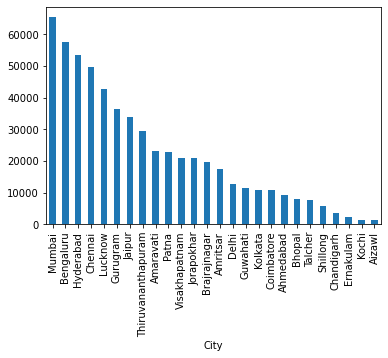

In [54]:
City_by_PM25['sum'].sort_values(ascending=False).plot(kind='bar')

Mumbai has the highest pm2.5 emissions， followed by Bengaluru. Aizawl has the lowest pm2.5 emissions.
 

In [55]:
City_by_PM10 = df.groupby('City')['PM10'].aggregate(['sum','mean','median','count'])
City_by_PM10

,sum,mean,median,count
City,,,,
Ahmedabad,18803.90,94.491960,95.680,199
Aizawl,1845.98,27.146765,19.945,68
Amaravati,49089.72,65.980806,59.030,744
Amritsar,36062.40,91.066667,87.415,396
Bengaluru,134115.56,82.178652,81.605,1632
Bhopal,19722.70,107.188587,113.935,184
Brajrajnagar,39239.34,93.649976,95.590,419
Chandigarh,8846.48,63.643741,59.040,139
Chennai,96805.59,87.845363,95.680,1102


<AxesSubplot:xlabel='City'>

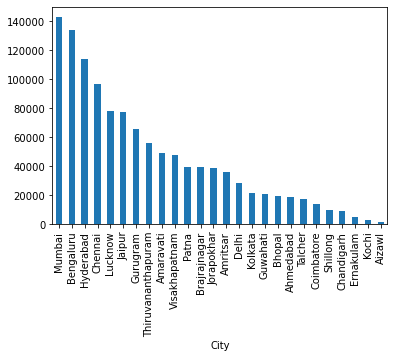

In [56]:
City_by_PM10['sum'].sort_values(ascending=False).plot(kind='bar')

Mumbai has the highest pm10 emissions， followed by Bengaluru. Aizawl has the lowest pm10 emissions.
 

<AxesSubplot:xlabel='City'>

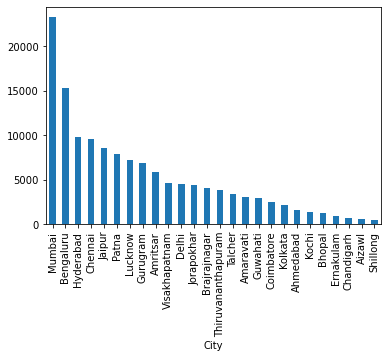

In [57]:
City_by_no = df.groupby('City')['NO'].aggregate(['sum','mean','median','count'])
City_by_no
City_by_no['sum'].sort_values(ascending=False).plot(kind='bar')

Mumbai has the highest NO emissions， followed by Bengaluru. Shillong has the lowest emissions.
 

<AxesSubplot:xlabel='City'>

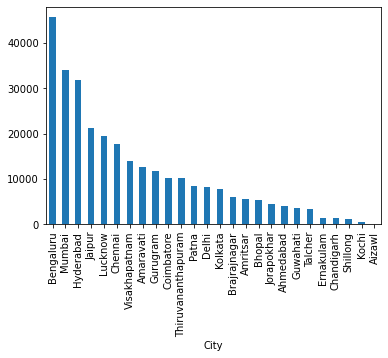

In [58]:
City_by_no2 = df.groupby('City')['NO2'].aggregate(['sum','mean','median','count'])
City_by_no2
City_by_no2['sum'].sort_values(ascending=False).plot(kind='bar')

Bengaluru has the highest NO2 emissions，followed by Mumbai. Aizawl has the lowest emissions.
 

<AxesSubplot:xlabel='City'>

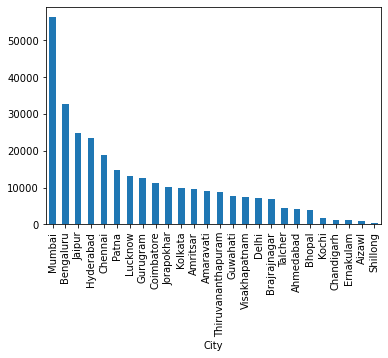

In [59]:
City_by_nox = df.groupby('City')['NOx'].aggregate(['sum','mean','median','count'])
City_by_nox
City_by_nox['sum'].sort_values(ascending=False).plot(kind='bar')

Mumbai has the highest NOx emissions，followed by Bengaluru. Shillong has the lowest emissions.
 

<AxesSubplot:xlabel='City'>

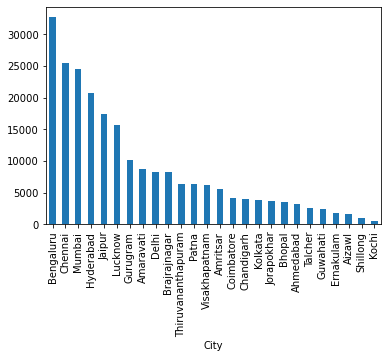

In [60]:
City_by_nh3 = df.groupby('City')['NH3'].aggregate(['sum','mean','median','count'])
City_by_nh3
City_by_nh3['sum'].sort_values(ascending=False).plot(kind='bar')

Bengaluru has the highest NO emissions， followed by Chennai . Kochi has the lowest emissions.
 

<AxesSubplot:xlabel='City'>

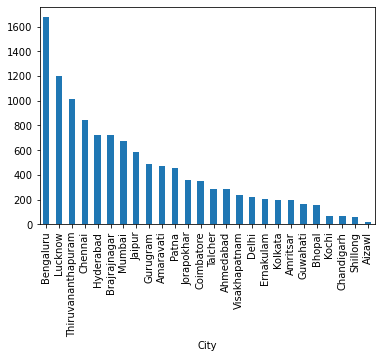

In [61]:
City_by_co = df.groupby('City')['CO'].aggregate(['sum','mean','median','count'])
City_by_co
City_by_co['sum'].sort_values(ascending=False).plot(kind='bar')

Bengaluru has the highest CO emissions， followed by Lucknow . Aizawl has the lowest emissions.
 

<AxesSubplot:xlabel='City'>

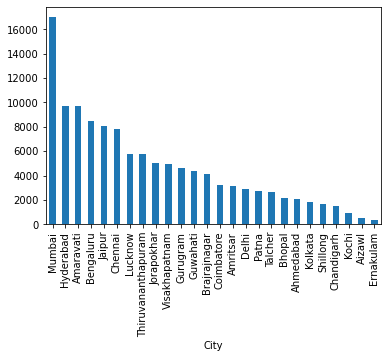

In [62]:
City_by_so2 = df.groupby('City')['SO2'].aggregate(['sum','mean','median','count'])
City_by_so2
City_by_so2['sum'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='City'>

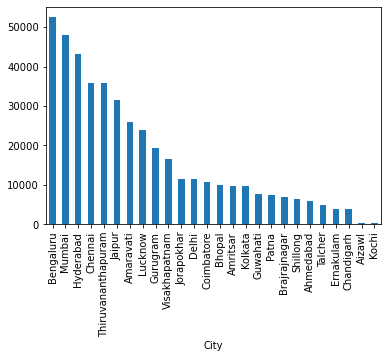

In [63]:
City_by_O3 = df.groupby('City')['O3'].aggregate(['sum','mean','median','count'])
City_by_O3
City_by_O3['sum'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='City'>

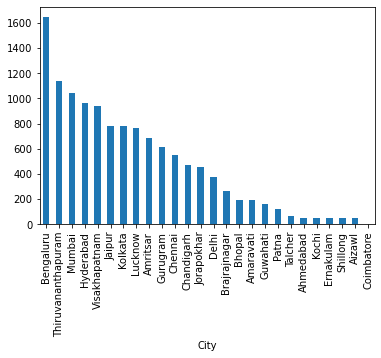

In [64]:
City_by_b = df.groupby('City')['Benzene'].aggregate(['sum','mean','median','count'])
City_by_b
City_by_b['sum'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='City'>

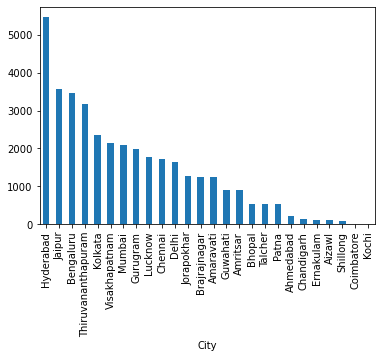

In [65]:
City_by_t = df.groupby('City')['Toluene'].aggregate(['sum','mean','median','count'])
City_by_t
City_by_t['sum'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='City'>

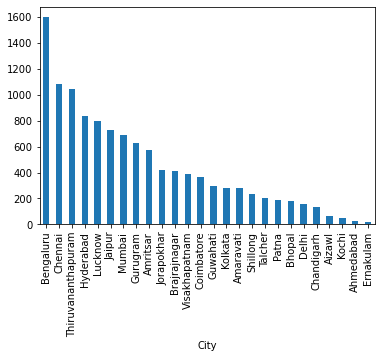

In [66]:
City_by_x = df.groupby('City')['Xylene'].aggregate(['sum','mean','median','count'])
City_by_x
City_by_x['sum'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='City'>

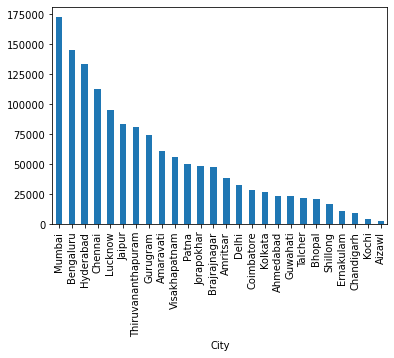

In [67]:
City_by_a = df.groupby('City')['AQI'].aggregate(['sum','mean','median','count'])
City_by_a
City_by_a['sum'].sort_values(ascending=False).plot(kind='bar')

Now, let's find the relationship bewtween those emission with AQI. 
 

In [68]:
emission_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

correlation_aqi_emissions = df[emission_columns + ['AQI']].corr()['AQI']

correlation_aqi_emissions

PM2.5      0.723683
PM10       0.682830
NO         0.228314
NO2        0.302894
NOx        0.275040
NH3        0.204140
CO         0.225973
SO2        0.150595
O3         0.288348
Benzene    0.018641
Toluene    0.061284
Xylene    -0.099226
AQI        1.000000
Name: AQI, dtype: float64

We can find that pm2.5 and pm10 will most affect the API.
Also, according to the data, Mumbai emits the most pm2.5 and pm10, and indeed its highest AQI indicates a worse air environment.


# 5. Feature Engineering

In [69]:
# Create a new feature "Total Emissions" which represents the total amount of all pollutants.
df['Total Emissions'] = df['PM2.5'] + df['PM10'] + df['NO'] + df['NO2'] + df['NOx'] + df['NH3'] + df['CO'] + df['SO2'] + df['O3'] + df['Benzene'] + df['Toluene'] + df['Xylene']

# Create a new feature "PM2.5 Percentage" which represents the percentage of PM2.5.
df['PM2.5 Percentage'] = df['PM2.5'] / df['Total Emissions']


In [70]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Total Emissions,PM2.5 Percentage
count,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000
mean,40.193943,82.281524,9.497215,20.160324,20.971632,15.875053,0.814808,8.397475,30.711218,0.866893,2.582013,0.809924,98.789057,233.162022,0.167856
std,20.658022,34.770574,7.667752,11.994288,15.358501,9.368865,0.719090,4.531974,15.254710,0.950267,2.586028,0.411301,35.378948,77.365979,0.057704
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.040000,0.010000,0.000000,0.000000,0.000000,13.000000,21.590000,0.000469
25%,23.702500,54.977500,4.380000,10.880000,9.750000,9.820000,0.380000,5.192500,19.730000,0.080000,0.420000,0.840000,71.000000,181.462500,0.128284
50%,40.790000,95.680000,8.540000,19.790000,20.065000,15.850000,0.730000,8.050000,30.840000,0.685000,2.970000,0.980000,100.000000,235.630000,0.165567
75%,48.570000,95.680000,10.760000,25.440000,26.520000,17.580000,1.050000,10.100000,39.167500,1.070000,2.970000,0.980000,118.000000,273.787500,0.197073
max,197.410000,199.680000,49.890000,74.890000,99.960000,50.000000,6.990000,25.000000,74.980000,5.000000,14.960000,2.000000,200.000000,549.640000,0.566025


In [71]:
# Select numerical columns (excluding 'AQI')
numerical_cols = df.drop('AQI', axis=1).select_dtypes(include=[np.number]).columns

# Calculate correlation of numerical columns with 'AQI'
correlation_with_aqi = df[numerical_cols].apply(lambda x: x.corr(df['AQI']))

# Select features that have a correlation greater than 0.5 with 'AQI'
selected_features = correlation_with_aqi[abs(correlation_with_aqi) > 0.5].index


In [72]:
selected_features

Index(['PM2.5', 'PM10', 'Total Emissions'], dtype='object')

In [73]:
# Create new interaction features
df['PM2.5_PM10_ratio'] = df['PM2.5'] / df['PM10']
df['PM2.5_Total Emissions_ratio'] = df['PM2.5'] / df['Total Emissions']


In [74]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Total Emissions,PM2.5 Percentage,PM2.5_PM10_ratio,PM2.5_Total Emissions_ratio
count,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000,14402.000000
mean,40.193943,82.281524,9.497215,20.160324,20.971632,15.875053,0.814808,8.397475,30.711218,0.866893,2.582013,0.809924,98.789057,233.162022,0.167856,1.422378,0.167856
std,20.658022,34.770574,7.667752,11.994288,15.358501,9.368865,0.719090,4.531974,15.254710,0.950267,2.586028,0.411301,35.378948,77.365979,0.057704,46.453404,0.057704
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.040000,0.010000,0.000000,0.000000,0.000000,13.000000,21.590000,0.000469,0.002797,0.000469
25%,23.702500,54.977500,4.380000,10.880000,9.750000,9.820000,0.380000,5.192500,19.730000,0.080000,0.420000,0.840000,71.000000,181.462500,0.128284,0.383510,0.128284
50%,40.790000,95.680000,8.540000,19.790000,20.065000,15.850000,0.730000,8.050000,30.840000,0.685000,2.970000,0.980000,100.000000,235.630000,0.165567,0.501301,0.165567
75%,48.570000,95.680000,10.760000,25.440000,26.520000,17.580000,1.050000,10.100000,39.167500,1.070000,2.970000,0.980000,118.000000,273.787500,0.197073,0.566259,0.197073
max,197.410000,199.680000,49.890000,74.890000,99.960000,50.000000,6.990000,25.000000,74.980000,5.000000,14.960000,2.000000,200.000000,549.640000,0.566025,4857.000000,0.566025


We can create features like 'Day of the Week', 'Month', 'Year', and 'Season'. Air quality might be different on weekdays vs. weekends, in different months or seasons, or across years due to changes in city infrastructure, policies, or weather patterns.

In [75]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create temporal features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Let's define the function 'assign_season' and then create the 'Season' feature.

def assign_season(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Fall'
    else:
        return 'Winter'

# Now, let's create the 'Season' feature
df['Season'] = df['Month'].apply(assign_season)

df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,AQI_Bucket,Total Emissions,PM2.5 Percentage,PM2.5_PM10_ratio,PM2.5_Total Emissions_ratio,Year,Month,Day,DayOfWeek,Season
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,...,Moderate,270.19,0.179762,0.507630,0.179762,2015,1,4,6,Winter
9,Ahmedabad,2015-01-10,48.57,95.68,9.89,7.04,0.00,15.85,0.89,8.29,...,Moderate,190.76,0.254613,0.507630,0.254613,2015,1,10,5,Winter
100,Ahmedabad,2015-04-11,61.06,95.68,3.52,14.03,17.59,15.85,3.52,8.08,...,Moderate,238.88,0.255610,0.638169,0.255610,2015,4,11,5,Spring
101,Ahmedabad,2015-04-12,39.42,95.68,5.28,19.56,24.66,15.85,5.28,17.66,...,Moderate,254.69,0.154776,0.411998,0.154776,2015,4,12,6,Spring
111,Ahmedabad,2015-04-22,63.38,95.68,3.44,13.28,15.44,15.85,3.44,24.79,...,Moderate,280.15,0.226236,0.662416,0.226236,2015,4,22,2,Spring


In [76]:
# Create lag features
# We will create lag features for 'PM2.5', 'PM10', and 'AQI' for the previous day

df.sort_values(['City', 'Date'], inplace=True)

df['PM2.5_lag1'] = df.groupby('City')['PM2.5'].shift(1)
df['PM10_lag1'] = df.groupby('City')['PM10'].shift(1)
df['AQI_lag1'] = df.groupby('City')['AQI'].shift(1)

df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_PM10_ratio,PM2.5_Total Emissions_ratio,Year,Month,Day,DayOfWeek,Season,PM2.5_lag1,PM10_lag1,AQI_lag1
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,...,0.507630,0.179762,2015,1,4,6,Winter,NaN,NaN,NaN
9,Ahmedabad,2015-01-10,48.57,95.68,9.89,7.04,0.00,15.85,0.89,8.29,...,0.507630,0.254613,2015,1,10,5,Winter,48.57,95.68,118.0
100,Ahmedabad,2015-04-11,61.06,95.68,3.52,14.03,17.59,15.85,3.52,8.08,...,0.638169,0.255610,2015,4,11,5,Spring,48.57,95.68,118.0
101,Ahmedabad,2015-04-12,39.42,95.68,5.28,19.56,24.66,15.85,5.28,17.66,...,0.411998,0.154776,2015,4,12,6,Spring,61.06,95.68,126.0
111,Ahmedabad,2015-04-22,63.38,95.68,3.44,13.28,15.44,15.85,3.44,24.79,...,0.662416,0.226236,2015,4,22,2,Spring,39.42,95.68,175.0


In [77]:
# Creating rolling window features

# We will create rolling window features for 'PM2.5', 'PM10', and 'AQI' for a window of 7 previous days
# We will calculate the mean, median, and standard deviation for these windows

df['PM2.5_rolling7_mean'] = df.groupby('City')['PM2.5'].transform(lambda x: x.rolling(7).mean())
df['PM2.5_rolling7_median'] = df.groupby('City')['PM2.5'].transform(lambda x: x.rolling(7).median())
df['PM2.5_rolling7_std'] = df.groupby('City')['PM2.5'].transform(lambda x: x.rolling(7).std())

df['PM10_rolling7_mean'] = df.groupby('City')['PM10'].transform(lambda x: x.rolling(7).mean())
df['PM10_rolling7_median'] = df.groupby('City')['PM10'].transform(lambda x: x.rolling(7).median())
df['PM10_rolling7_std'] = df.groupby('City')['PM10'].transform(lambda x: x.rolling(7).std())

df['AQI_rolling7_mean'] = df.groupby('City')['AQI'].transform(lambda x: x.rolling(7).mean())
df['AQI_rolling7_median'] = df.groupby('City')['AQI'].transform(lambda x: x.rolling(7).median())
df['AQI_rolling7_std'] = df.groupby('City')['AQI'].transform(lambda x: x.rolling(7).std())

df.head(10)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,AQI_lag1,PM2.5_rolling7_mean,PM2.5_rolling7_median,PM2.5_rolling7_std,PM10_rolling7_mean,PM10_rolling7_median,PM10_rolling7_std,AQI_rolling7_mean,AQI_rolling7_median,AQI_rolling7_std
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ahmedabad,2015-01-10,48.57,95.68,9.89,7.04,0.00,15.85,0.89,8.29,...,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,Ahmedabad,2015-04-11,61.06,95.68,3.52,14.03,17.59,15.85,3.52,8.08,...,118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Ahmedabad,2015-04-12,39.42,95.68,5.28,19.56,24.66,15.85,5.28,17.66,...,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,Ahmedabad,2015-04-22,63.38,95.68,3.44,13.28,15.44,15.85,3.44,24.79,...,175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,Ahmedabad,2015-05-07,51.03,95.68,6.24,20.47,26.20,15.85,6.24,15.50,...,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Ahmedabad,2015-07-16,65.37,95.68,0.64,8.07,8.57,15.85,0.64,16.31,...,158.0,53.914286,51.03,9.551794,95.68,95.68,0.0,141.285714,126.0,32.474166
197,Ahmedabad,2015-07-17,56.28,95.68,0.60,8.02,8.51,15.85,0.60,18.93,...,105.0,55.015714,56.28,9.273293,95.68,95.68,0.0,138.857143,126.0,35.040113
198,Ahmedabad,2015-07-18,48.17,95.68,0.65,8.00,8.55,15.85,0.65,18.99,...,101.0,54.958571,56.28,9.320743,95.68,95.68,0.0,135.285714,126.0,38.612236
199,Ahmedabad,2015-07-19,33.56,95.68,0.72,7.89,8.56,15.85,0.72,11.28,...,93.0,51.030000,51.03,11.789071,95.68,95.68,0.0,126.857143,105.0,46.591947


In [78]:
# Encoding categorical features

# For 'AQI_Bucket', we'll use ordinal encoding, as it has an order (Good < Satisfactory < Moderate < Poor < Very Poor < Severe)
# We first need to define the mapping from category to number
aqi_bucket_mapping = {
    'Good': 1,
    'Satisfactory': 2,
    'Moderate': 3,
    'Poor': 4,
    'Very Poor': 5,
    'Severe': 6
}

df['AQI_Bucket_encoded'] = df['AQI_Bucket'].map(aqi_bucket_mapping)

df.head(20)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_rolling7_mean,PM2.5_rolling7_median,PM2.5_rolling7_std,PM10_rolling7_mean,PM10_rolling7_median,PM10_rolling7_std,AQI_rolling7_mean,AQI_rolling7_median,AQI_rolling7_std,AQI_Bucket_encoded
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
9,Ahmedabad,2015-01-10,48.57,95.68,9.89,7.04,0.00,15.85,0.89,8.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
100,Ahmedabad,2015-04-11,61.06,95.68,3.52,14.03,17.59,15.85,3.52,8.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
101,Ahmedabad,2015-04-12,39.42,95.68,5.28,19.56,24.66,15.85,5.28,17.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
111,Ahmedabad,2015-04-22,63.38,95.68,3.44,13.28,15.44,15.85,3.44,24.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
126,Ahmedabad,2015-05-07,51.03,95.68,6.24,20.47,26.20,15.85,6.24,15.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
196,Ahmedabad,2015-07-16,65.37,95.68,0.64,8.07,8.57,15.85,0.64,16.31,...,53.914286,51.03,9.551794,95.68,95.68,0.0,141.285714,126.0,32.474166,3
197,Ahmedabad,2015-07-17,56.28,95.68,0.60,8.02,8.51,15.85,0.60,18.93,...,55.015714,56.28,9.273293,95.68,95.68,0.0,138.857143,126.0,35.040113,3
198,Ahmedabad,2015-07-18,48.17,95.68,0.65,8.00,8.55,15.85,0.65,18.99,...,54.958571,56.28,9.320743,95.68,95.68,0.0,135.285714,126.0,38.612236,2
199,Ahmedabad,2015-07-19,33.56,95.68,0.72,7.89,8.56,15.85,0.72,11.28,...,51.030000,51.03,11.789071,95.68,95.68,0.0,126.857143,105.0,46.591947,2


# 6. Model Development and Evaluation

In [79]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket',
       'Total Emissions', 'PM2.5 Percentage', 'PM2.5_PM10_ratio',
       'PM2.5_Total Emissions_ratio', 'Year', 'Month', 'Day', 'DayOfWeek',
       'Season', 'PM2.5_lag1', 'PM10_lag1', 'AQI_lag1', 'PM2.5_rolling7_mean',
       'PM2.5_rolling7_median', 'PM2.5_rolling7_std', 'PM10_rolling7_mean',
       'PM10_rolling7_median', 'PM10_rolling7_std', 'AQI_rolling7_mean',
       'AQI_rolling7_median', 'AQI_rolling7_std', 'AQI_Bucket_encoded'],
      dtype='object')

In [80]:
df['AQI'].describe()

count    14402.000000
mean        98.789057
std         35.378948
min         13.000000
25%         71.000000
50%        100.000000
75%        118.000000
max        200.000000
Name: AQI, dtype: float64

In [81]:
# Split the dataset into features (X) and target variable (y)
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'Total Emissions']]
y = df['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [82]:
# Create a Linear Regression model
reg_model = LinearRegression()

# Train the model using the training data
reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg_model.predict(X_test)

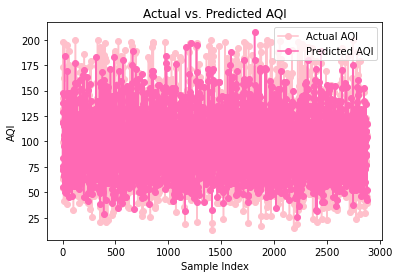

In [83]:
# Visualize the results with lines
plt.plot(y_test.values, label='Actual AQI', linestyle='-', marker='o', color="pink")
plt.plot(y_pred, label='Predicted AQI', linestyle='-', marker='o', color="hotpink")
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI')
plt.legend()
plt.show()

In [84]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 441.2699295620236
R-squared: 0.6514781318921968


In [85]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

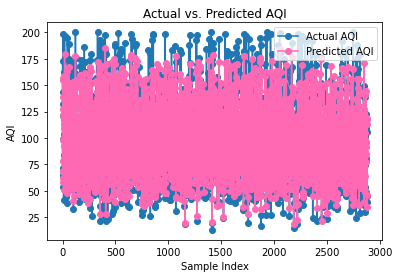

In [86]:
# Visualize the results with lines
plt.plot(y_test.values, label='Actual AQI', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicted AQI', linestyle='-', marker='o', color="hotpink")
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI')
plt.legend()
plt.show()

In [87]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 275.9718907470522
R-squared: 0.7820330993234242


In [88]:
# Build and train the regression model
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

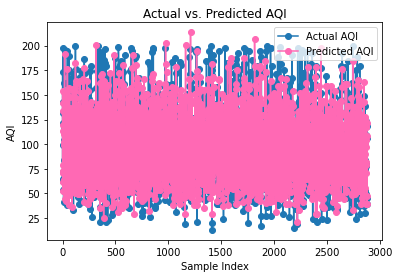

In [89]:
# Visualize the results with lines
plt.plot(y_test.values, label='Actual AQI', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicted AQI', linestyle='-', marker='o', color="hotpink")
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI')
plt.legend()
plt.show()

In [90]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 449.52643763234744
R-squared: 0.6449570131303258


In [91]:
# Build and train the regression model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

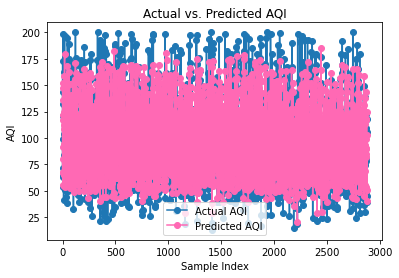

In [92]:
# Visualize the results with lines
plt.plot(y_test.values, label='Actual AQI', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicted AQI', linestyle='-', marker='o', color="hotpink")
plt.xlabel('Sample Index')
plt.ylabel('AQI')
plt.title('Actual vs. Predicted AQI')
plt.legend()
plt.show()

In [93]:
# Evaluate the model.
# Gradient boosting is the most accurate model!
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 310.4353848479985
R-squared: 0.7548132945261526


In [94]:
# Get the feature importances from the Gradient Boosting model
feature_importances = gb_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
            Feature  Importance
0             PM2.5    0.462953
12  Total Emissions    0.234808
1              PM10    0.146413
6                CO    0.093822
8                O3    0.021700
5               NH3    0.007605
2                NO    0.006255
7               SO2    0.006149
11           Xylene    0.005710
3               NO2    0.005629
4               NOx    0.005335
10          Toluene    0.002689
9           Benzene    0.000932


In [95]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_rolling7_mean,PM2.5_rolling7_median,PM2.5_rolling7_std,PM10_rolling7_mean,PM10_rolling7_median,PM10_rolling7_std,AQI_rolling7_mean,AQI_rolling7_median,AQI_rolling7_std,AQI_Bucket_encoded
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
9,Ahmedabad,2015-01-10,48.57,95.68,9.89,7.04,0.00,15.85,0.89,8.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
100,Ahmedabad,2015-04-11,61.06,95.68,3.52,14.03,17.59,15.85,3.52,8.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
101,Ahmedabad,2015-04-12,39.42,95.68,5.28,19.56,24.66,15.85,5.28,17.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
111,Ahmedabad,2015-04-22,63.38,95.68,3.44,13.28,15.44,15.85,3.44,24.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [96]:
df["City"].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [97]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,PM2.5_rolling7_mean,PM2.5_rolling7_median,PM2.5_rolling7_std,PM10_rolling7_mean,PM10_rolling7_median,PM10_rolling7_std,AQI_rolling7_mean,AQI_rolling7_median,AQI_rolling7_std,AQI_Bucket_encoded
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
9,Ahmedabad,2015-01-10,48.57,95.68,9.89,7.04,0.00,15.85,0.89,8.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
100,Ahmedabad,2015-04-11,61.06,95.68,3.52,14.03,17.59,15.85,3.52,8.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
101,Ahmedabad,2015-04-12,39.42,95.68,5.28,19.56,24.66,15.85,5.28,17.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
111,Ahmedabad,2015-04-22,63.38,95.68,3.44,13.28,15.44,15.85,3.44,24.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [98]:
df['Date'] = pd.to_datetime(df['Date'])

In [99]:
df['Year'] = df['Date'].dt.year

In [100]:
# Prepare the data for clustering (group by 'City' and 'Year' and calculate the yearly averages)
city_yearly_avg = df.groupby(['City', 'Year'])[features].mean().reset_index()
print(city_yearly_avg)

NameError: name 'features' is not defined

In [101]:
# Standardize the data to have zero mean and unit varianc
scaler = StandardScaler()
X_scaled = scaler.fit_transform(city_yearly_avg[features])

# Determine the optimal number of clusters (k) using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to identify the optimal k value
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

NameError: name 'city_yearly_avg' is not defined

In [ ]:
# k= is where you set the number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
city_yearly_avg['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Create a mapping dictionary for cluster numbers to categories
cluster_categories = {
    0: 'Moderate',
    1: 'Bad',
    2: 'Good',
    3: 'Severe'
}

# Map the cluster numbers to categorical labels
city_yearly_avg['AirQualityCategory'] = city_yearly_avg['Cluster'].map(cluster_categories)

In [ ]:
# Create a scatter plot for each cluster (assuming the number of clusters is always 4)
for cluster_label in range(4):
    cluster_data = city_yearly_avg[city_yearly_avg['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PM2.5'], cluster_data['PM10'], label=f'Cluster {cluster_label} ({cluster_categories[cluster_label]})')

plt.xlabel('PM2.5 (μg/m³)')
plt.ylabel('PM10 (μg/m³)')
plt.title('Scatter Plot of Clustering Results (K = 3)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Create a new DataFrame with the desired columns
result_df = city_yearly_avg[['City', 'Year', 'AirQualityCategory']]

# Print the result DataFrame
print(result_df)

In [ ]:
result_df["City"].unique()

In [ ]:
amaravati = result_df[result_df["City"] == "Amaravati"]
amritsar = result_df[result_df["City"] == "Amritsar"]
chandigarh = result_df[result_df["City"] == "Chandigarh"]
delhi = result_df[result_df["City"] == "Delhi"]
gurugram = result_df[result_df["City"] == "Gurugram"]
hyderabad = result_df[result_df["City"] == "Hyderabad"]
kolkata = result_df[result_df["City"] == "Kolkata"]
patna = result_df[result_df["City"] == "Patna"]
visakhapatnam = result_df[result_df["City"] == "Visakhapatnam"]

In [ ]:
plt.figure(figsize=(25, 20))

In [ ]:
# Create line plots

plt.plot(amaravati["Year"], amaravati["AirQualityCategory"], marker='o', linestyle='-', label='Amaravati', color='blue')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Air Quality Category")
plt.title("Air Quality Over the Years")

years = range(2015, 2020)
plt.xticks(years)

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Create line plots

plt.plot(amritsar["Year"], amritsar["AirQualityCategory"], marker='o', linestyle='-', label='Amritsar', color='yellow')


# Add labels and title
plt.xlabel("Year")
plt.ylabel("Air Quality Category")
plt.title("Air Quality Over the Years")

years = range(2015, 2021)
plt.xticks(years)

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Create line plots
# some are commented out because they don't have very much data

plt.plot(chandigarh["Year"], chandigarh["AirQualityCategory"], marker='o', linestyle='-', label='Chandigarh', color='orange')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Air Quality Category")
plt.title("Air Quality Over the Years")

years = range(2015, 2021)
plt.xticks(years)

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Create line plots
# some are commented out because they don't have very much data

plt.plot(delhi["Year"], delhi["AirQualityCategory"], marker='o', linestyle='-', label='Delhi', color='red')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Air Quality Category")
plt.title("Air Quality Over the Years")

years = range(2015, 2021)
plt.xticks(years)

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Create line plots
# some are commented out because they don't have very much data

plt.plot(gurugram["Year"], gurugram["AirQualityCategory"], marker='o', linestyle='-', label='Gurugram', color='green')


# Add labels and title
plt.xlabel("Year")
plt.ylabel("Air Quality Category")
plt.title("Air Quality Over the Years")

years = range(2015, 2021)
plt.xticks(years)

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Create line plots
# some are commented out because they don't have very much data

plt.plot(hyderabad["Year"], hyderabad["AirQualityCategory"], marker='o', linestyle='-', label='Hyderabad', color='pink')


# Add labels and title
plt.xlabel("Year")
plt.ylabel("Air Quality Category")
plt.title("Air Quality Over the Years")

years = range(2015, 2021)
plt.xticks(years)

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Create line plots
# some are commented out because they don't have very much data


plt.plot(kolkata["Year"], kolkata["AirQualityCategory"], marker='o', linestyle='-', label='Kolkata', color='purple')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Air Quality Category")
plt.title("Air Quality Over the Years")

years = range(2015, 2021)
plt.xticks(years)

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Create line plots
# some are commented out because they don't have very much data

plt.plot(patna["Year"], patna["AirQualityCategory"], marker='o', linestyle='-', label='Patna', color='black')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Air Quality Category")
plt.title("Air Quality Over the Years")

years = range(2015, 2021)
plt.xticks(years)

# Show the plot
plt.legend()
plt.show()

In [ ]:
# Create line plots
# some are commented out because they don't have very much data

plt.plot(visakhapatnam["Year"], visakhapatnam["AirQualityCategory"], marker='o', linestyle='-', label='Visakhapatnam', color='skyblue')

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Air Quality Category")
plt.title("Air Quality Over the Years")

years = range(2015, 2021)
plt.xticks(years)

# Show the plot
plt.legend()
plt.show()

In [ ]:
result_df[result_df['AirQualityCategory'] == 'Bad']

In [ ]:
result_df[result_df['AirQualityCategory'] == 'Moderate']

In [ ]:
result_df[result_df['AirQualityCategory'] == 'Good']

In [ ]:
result_df[result_df['AirQualityCategory'] == 'Severe']

# 7. Conclusion

From our

1. Problem Statement

The disparity in air quality across Indian cities calls for a thorough analysis and effective measures to address this environmental concern, aiming to improve public health and well-being. 

and 

2. Hypothesis

Higher amounts of all parameters causes a higher AQI per city (Air Pollution)

The conclusion from our analysis and model tells that .............................

# THE END